In [42]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

from mlxtend.evaluate import feature_importance_permutation

from mlxtend.plotting import plot_pca_correlation_graph


from sklearn.tree import export_graphviz
import graphviz

from sklearn.tree._tree import TREE_LEAF

import warnings
warnings.filterwarnings("ignore")

In [43]:
import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [64]:
import xgboost as xgb

In [45]:
df=pd.read_csv('num_cols.csv')

In [46]:
df1=pd.read_csv('training_set_values.csv')

In [47]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
encoder=TargetEncoder

In [48]:
df['payment_type']=lb.fit_transform(df1['payment_type'])
df

,Unnamed: 0,gps_height,longitude,latitude,population,public_meeting,permit,construction_year,status_code,payment_value,...,funder_code,installer_code,basin_code,extraction_code,management_code,quality_code,quantity_code,source_code,waterpoint_code,payment_type
0,0,1390,34.938093,-9.856322,109,True,False,1999,1,1,...,11,10,1,1,7,6,1,8,1,0
1,1,1399,34.698766,-2.147466,280,True,True,2010,1,0,...,11,10,4,1,11,6,2,5,1,2
2,2,686,37.460664,-3.821329,250,True,True,2009,1,1,...,11,16,5,1,7,6,1,0,2,5
3,3,263,38.486161,-11.155298,58,True,True,1986,0,0,...,16,10,7,10,7,6,0,3,2,2
4,4,0,31.130847,-1.825359,281,True,True,2000,1,0,...,11,10,4,1,1,6,3,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,59395,1210,37.169807,-3.253847,125,True,True,1999,1,1,...,5,10,5,1,9,6,1,8,1,5
59396,59396,1212,35.249991,-9.070629,56,True,True,1996,1,1,...,11,10,6,1,7,6,1,6,1,0
59397,59397,0,34.017087,-8.750434,281,True,False,2000,1,1,...,17,14,6,11,7,1,1,3,4,1
59398,59398,0,35.861315,-6.378573,281,True,True,2000,1,0,...,11,10,6,5,7,6,2,7,4,2


In [49]:
df=df.drop(columns='Unnamed: 0')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
gps_height           59400 non-null int64
longitude            59400 non-null float64
latitude             59400 non-null float64
population           59400 non-null int64
public_meeting       59400 non-null bool
permit               59400 non-null bool
construction_year    59400 non-null int64
status_code          59400 non-null int64
payment_value        59400 non-null int64
region_number        59400 non-null int64
funder_code          59400 non-null int64
installer_code       59400 non-null int64
basin_code           59400 non-null int64
extraction_code      59400 non-null int64
management_code      59400 non-null int64
quality_code         59400 non-null int64
quantity_code        59400 non-null int64
source_code          59400 non-null int64
waterpoint_code      59400 non-null int64
payment_type         59400 non-null int32
dtypes: bool(2), float64(2), int32(1), int64(15)


In [51]:
df['permit'] = df['permit'].astype(bool).astype(int)

In [52]:
df['public_meeting'] = df['public_meeting'].astype(bool).astype(int)

In [53]:
target='status_code'

In [54]:
used_cols=used_cols = [c for c in df.columns.tolist() if c not in [target]]
X=df[used_cols]
y=df[target]

In [55]:
# scaler = RobustScaler()

# encoder = ce.WOEEncoder(cols=cat_col)

# following steps will try later on to improve 
# Creating the separate transformers for numeric and categorical columns
# num_transformer = make_pipeline(scaler)
# cat_transformer = make_pipeline(encoder)

# # Defining preprocessor, which combines the two transformers
# preprocessor = ColumnTransformer(
#     transformers=[('num', num_transformer, num_col),
#                   ('cat', cat_transformer, cat_col)])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

TRAIN accuracy: 0.6304924242424242
TEST accuracy: 0.6377104377104377


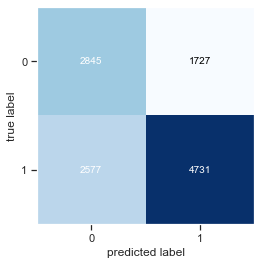

In [57]:
lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42)

pipe = make_pipeline(lr)
pipe.fit(X_train, y_train)


# make predictions on training set
y_pred = pipe.predict(X_train)

# make predictions on test set
y_score = pipe.predict(X_test)

print("TRAIN accuracy:",accuracy_score(y_train, y_pred))
print("TEST accuracy:",accuracy_score(y_test, y_score))

cm = confusion_matrix(y_test, y_score)
plot_confusion_matrix(cm)
plt.show()

## Decision Tree

### WoE-Scorecard

In [58]:
def plot_tree(dt, used_cols, out_file='mytree.dot'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)
    

def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are children, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)
        
        
def stringify(data):
    X = pd.DataFrame(data)
    for c in X.columns.tolist():
        X[c] = X[c].astype(str)
    return X

objectify = FunctionTransformer(func=stringify, check_inverse=False)

In [60]:
used_cols = [c for c in df.columns.tolist() if c not in [target]]
X, y = df[used_cols], df[target]

binner = KBinsDiscretizer(n_bins=10, strategy='quantile', encode='ordinal')
encoder = WOEEncoder()
clf = LogisticRegression(class_weight='balanced')
pipe = make_pipeline(binner, objectify, encoder, clf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.7751292082705519 +/- 0.07647231030747585


In [61]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

## Decision Tree Classifier

In [62]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)

train_preds=dt.predict_proba(X_train)[:,1]
test_preds=dt.predict_proba(X_test)[:,1]

train_score = roc_auc_score(y_train, train_preds)
test_score = roc_auc_score(y_test, test_preds)

print(f"Train ROC-AUC: {train_score}")
print(f"Test ROC-AUC: {test_score}")

Train ROC-AUC: 0.9999966828874219
Test ROC-AUC: 0.8089878671775224


In [69]:
dt_2=DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=5)

dt_2.fit(X_train,y_train)

train_preds = dt_2.predict_proba(X_train)[:,1]
test_preds = dt_2.predict_proba(X_test)[:,1]

train_score = roc_auc_score(y_train, train_preds)
test_score = roc_auc_score(y_test, test_preds)

print(f"Train ROC-AUC: {train_score}")
print(f"Test ROC-AUC: {test_score}")

Train ROC-AUC: 0.7856221481255649
Test ROC-AUC: 0.7902664735155233


In [70]:
dt = DecisionTreeClassifier()

grid_params = {'class_weight': [None,'balanced'], 'max_depth':[4,5,6], 'max_features': ['sqrt','log2']}

grid_search = GridSearchCV(dt, grid_params, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [None, 'balanced'],
                 

In [71]:
grid_search.best_params_

{'class_weight': 'balanced', 'max_depth': 6, 'max_features': 'log2'}

In [72]:
dt_grid = grid_search.best_estimator_

dt_grid.fit(X_train, y_train)

train_preds = dt_grid.predict_proba(X_train)[:, 1]
test_preds = dt_grid.predict_proba(X_test)[:, 1]

train_score = roc_auc_score(y_train, train_preds)
test_score = roc_auc_score(y_test, test_preds)

print(f"Train ROC-AUC: {train_score}")
print(f"Test ROC-AUC: {test_score}")

Train ROC-AUC: 0.7828170343075701
Test ROC-AUC: 0.7821270904355344
